# SOM (Koholen Maps)

SOM (Self-Organizing Maps) is a type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples. The SOM algorithm uses competitive learning to train the neurons to represent the input data in a way that preserves the topological properties of the input space. The SOM algorithm is also known as Kohonen Maps, named after Teuvo Kohonen, the inventor of the algorithm.

## Setup

### Set Random State Seed

In [1]:
import random
import numpy as np

seed = 42
random.seed(seed)
np.random.seed(seed)

### Import external lib

In [2]:
import os
import sys

project_root = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir)
)
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from src.data_loader.mnist_dataset import load_mnist_data
    from src.data_loader.toy_dataset import load_toy_data
    from src.algorithms.som.som import SOM
except ModuleNotFoundError as e:
    print(e)

2024-06-27 15:39:41.507165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 15:39:42.713373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Test on toy data

100%|██████████| 100/100 [00:10<00:00,  9.91it/s]


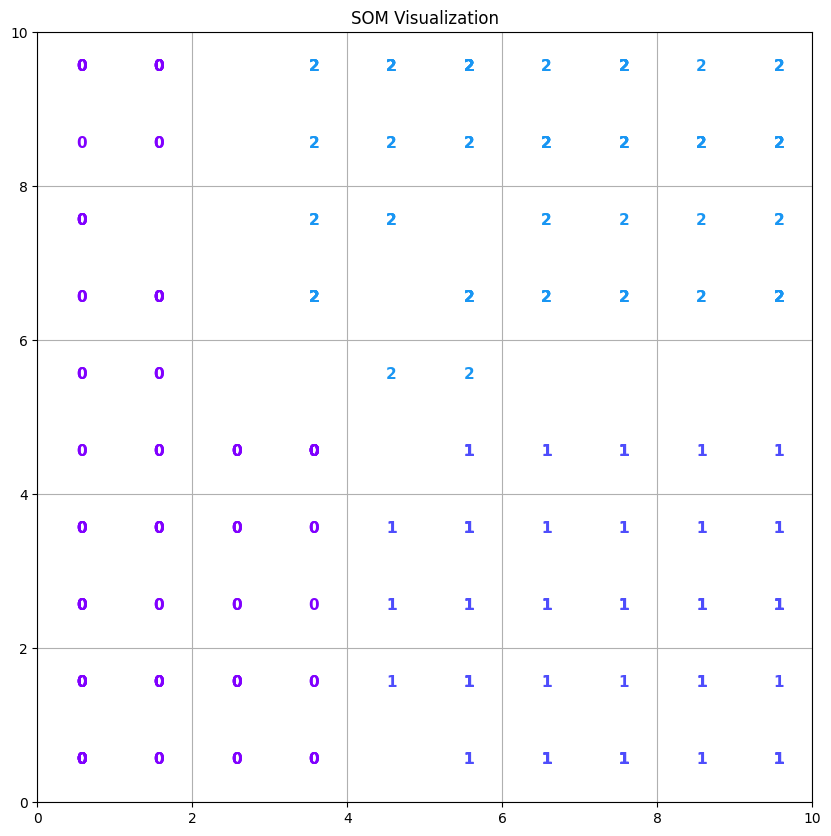

In [3]:
import matplotlib.pyplot as plt

data, labels = load_toy_data(n_samples=300, n_features=2, n_clusters=3, random_state=42)

som = SOM(x=10, y=10, input_dim=2, learning_rate=0.5, sigma=3.0)
som.train(data, num_iterations=100)

plt.figure(figsize=(10, 10))
for i, (x, y) in enumerate(som.map_vects(data)):
    plt.text(x + 0.5, y + 0.5, str(labels[i]),
                color=plt.cm.rainbow(labels[i] / 10.),
                fontdict={'weight': 'bold', 'size': 11})
plt.xlim([0, som.x])
plt.ylim([0, som.y])
plt.grid()
plt.title('SOM Visualization')
plt.show()

## Load MNIST Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist_data()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))